In [3]:
from gbfs import GBAFS

%matplotlib inline

## Example 1: t-SNE + JM distance

### Step 1: Init a dimensionality reduction method

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10)

### Step 2: Init a GB-AFS object

In [5]:
gbafs = GBAFS(
    dataset_path='microsoft_malware_sample.csv',
    separability_metric='jm',
    dim_reducer_model=tsne,
)

### Step 3: Feature Selection

In [6]:
selected_features = gbafs.select_features()

print("Selected Feature Indices:", selected_features)

Clustering Evaluation Using MSS: 100%|███████████████████████████████████████████████| 255/255 [15:00<00:00,  3.53s/it]

Selected Feature Indices: [126, 15, 35, 119, 47, 246, 120, 169, 9, 217, 105, 135, 208, 252, 70, 110, 14, 86, 28, 40, 151, 225, 84, 136, 75, 50, 182, 81, 218, 112, 52, 23, 209, 10, 247, 113, 156, 8, 91]


### Step 4: Visualizing the Feature Space

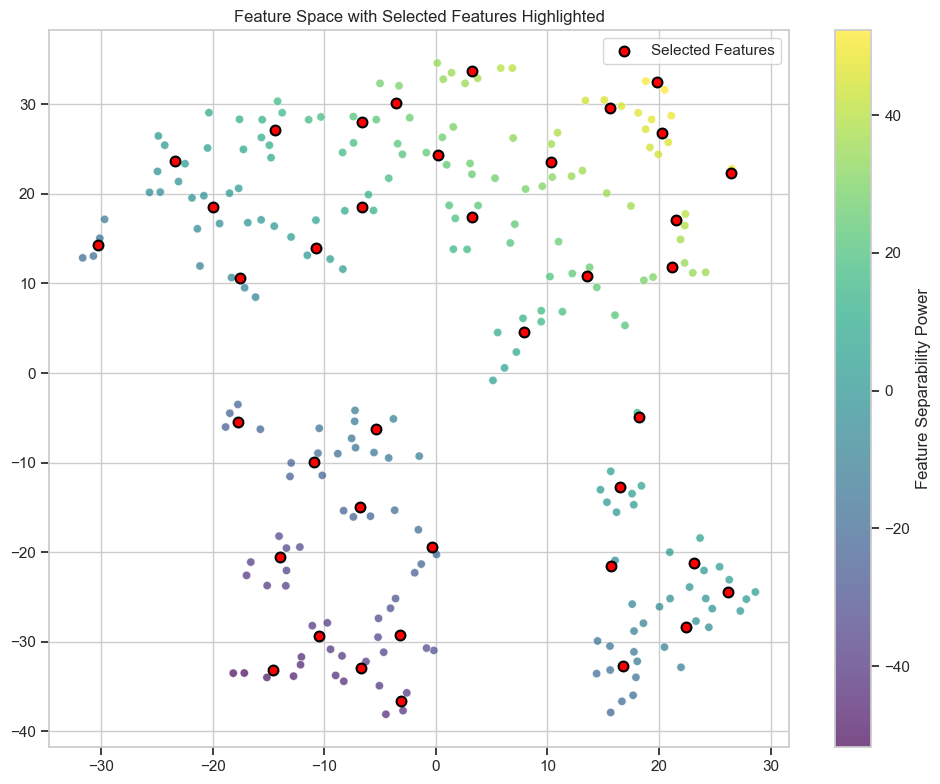

In [7]:
gbafs.plot_feature_space()

## Example 2: Umap + Bhattacharyya distance

In [8]:
import umap

umap = umap.UMAP()

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
gbafs = GBAFS(
    dataset_path='microsoft_malware_sample.csv',
    separability_metric='bhattacharyya',
    dim_reducer_model=umap,
)

In [10]:
selected_features = gbafs.select_features()

print("Selected Feature Indices:", selected_features)

Clustering Evaluation Using MSS: 100%|███████████████████████████████████████████████| 255/255 [15:58<00:00,  3.76s/it]

Selected Feature Indices: [69, 162, 23, 245, 181, 12, 210, 180, 53, 35, 169, 249, 122, 139, 246, 70, 189, 204, 101, 120, 146, 235, 31, 242, 5, 111, 41, 195, 61, 153, 74, 191, 77, 201]


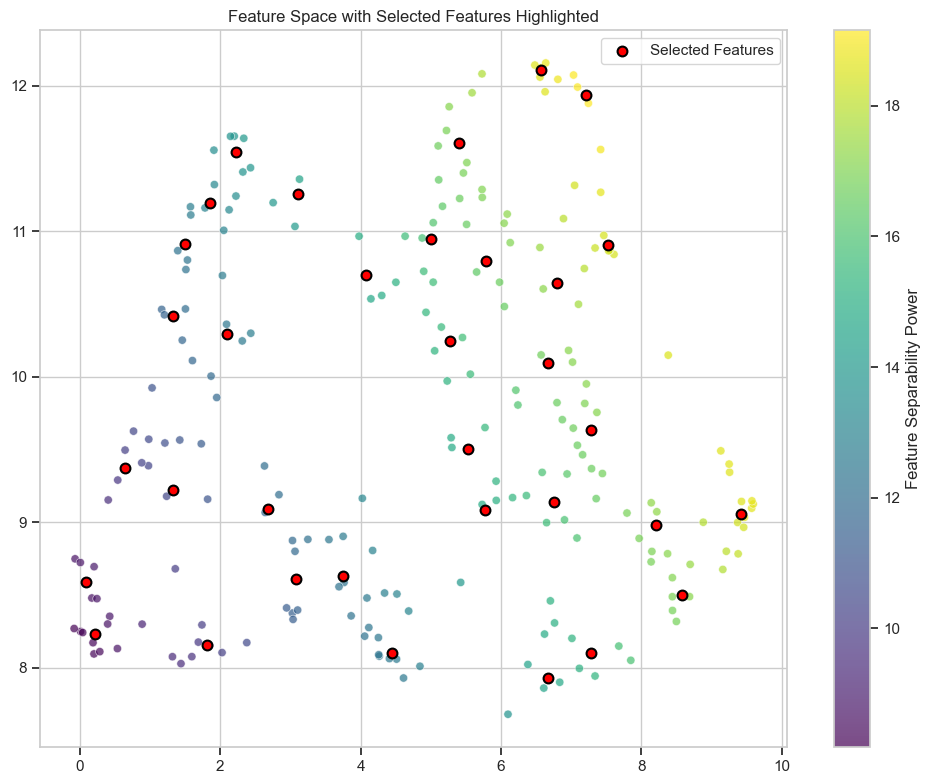

In [11]:
gbafs.plot_feature_space()

## GB-AFS Properites

In [12]:
# get the total number of features in the given dataset
gbafs.number_of_features

257

In [13]:
# get the knee value (= number of selected features)
gbafs.knee

34

In [14]:
# get the mss value
gbafs.mss

0.92364705

In [15]:
# get the final selected features
gbafs.selected_features

array([ 69, 162,  23, 245, 181,  12, 210, 180,  53,  35, 169, 249, 122,
       139, 246,  70, 189, 204, 101, 120, 146, 235,  31, 242,   5, 111,
        41, 195,  61, 153,  74, 191,  77, 201])

In [16]:
# get the location final selected features
gbafs.selected_features_loc

array([[ 3.7453282 ,  8.629713  ],
       [ 5.7835402 , 10.79407   ],
       [ 1.5017265 , 10.908817  ],
       [ 8.583621  ,  8.500388  ],
       [ 6.754733  ,  9.138075  ],
       [ 1.8620341 , 11.192142  ],
       [ 6.5634747 , 12.104051  ],
       [ 7.5212746 , 10.907296  ],
       [ 5.5300875 ,  9.499705  ],
       [ 4.9989195 , 10.945268  ],
       [ 1.3327279 , 10.416037  ],
       [ 6.6634154 ,  7.9282603 ],
       [ 7.216491  , 11.936171  ],
       [ 2.6848917 ,  9.092121  ],
       [ 9.421382  ,  9.053324  ],
       [ 4.448102  ,  8.098208  ],
       [ 7.2778177 ,  9.634898  ],
       [ 0.21131575,  8.230459  ],
       [ 3.1076438 , 11.252547  ],
       [ 1.8115346 ,  8.157262  ],
       [ 6.800471  , 10.641028  ],
       [ 1.3298168 ,  9.223095  ],
       [ 0.6473928 ,  9.372736  ],
       [ 0.08628144,  8.586644  ],
       [ 4.076479  , 10.698027  ],
       [ 7.284007  ,  8.101987  ],
       [ 5.280349  , 10.24724   ],
       [ 5.7665825 ,  9.082189  ],
       [ 5.399298  ,

In [17]:
# get the separation matrix (where for each feature, there's a score indicating the ability to differentiate between each pair of classes)
# num of rows = num of features
# num of cols = num of unique combinations of class pairs
gbafs.separation_matrix

array([[0.61192466, 5.56105696, 0.03715338, ..., 6.74723492, 0.58218001,
        0.5632193 ],
       [0.01948035, 1.50756204, 1.16053902, ..., 0.61891048, 0.06686134,
        0.86662627],
       [0.61405353, 0.45260879, 1.16291732, ..., 1.02535819, 0.00776502,
        0.94339808],
       ...,
       [0.52214982, 0.53005714, 0.42483154, ..., 0.10066434, 0.99094794,
        1.27751106],
       [0.5483762 , 0.4360825 , 0.42370726, ..., 0.14096519, 1.07107864,
        1.45493269],
       [0.15842466, 0.93997765, 0.91564232, ..., 0.01825575, 0.41482445,
        0.44235347]])